In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib as plt

In [45]:


df = pd.read_csv('../../datasets/telegram/fakeTelegram.BR_2022.csv')
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


In [46]:
# Linhas e colunas
df.shape

(557586, 19)

In [47]:
df.isnull()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,True
1,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,True
2,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557581,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
557582,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
557583,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
557584,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Somando quantas celulas estão faltando 
linhas_nulas = df.isnull().sum(axis=1)
print(sum(linhas_nulas))

2544186


In [49]:
# Contando quantos valores faltantes possuem cada coluna
valores_nulos = df.isnull().sum()
print(valores_nulos)

date_message                   0
id_member_anonymous       323341
id_group_anonymous             0
media                     224981
media_type                224981
media_url                 400141
has_media                      0
has_media_url                  0
trava_zap                      0
text_content_anonymous    113385
dataset_info_id                0
date_system                    0
score_sentiment           113429
score_misinformation      390348
id_message                     0
message_type                   0
messenger                      0
media_name                528599
media_md5                 224981
dtype: int64


In [50]:
# Indentificando linhas repetidas
duplicadas = df.duplicated()
linhas_duplicadas = df[duplicadas]

print(linhas_duplicadas)

Empty DataFrame
Columns: [date_message, id_member_anonymous, id_group_anonymous, media, media_type, media_url, has_media, has_media_url, trava_zap, text_content_anonymous, dataset_info_id, date_system, score_sentiment, score_misinformation, id_message, message_type, messenger, media_name, media_md5]
Index: []


In [51]:
df.dtypes

date_message               object
id_member_anonymous        object
id_group_anonymous         object
media                      object
media_type                 object
media_url                  object
has_media                    bool
has_media_url                bool
trava_zap                    bool
text_content_anonymous     object
dataset_info_id             int64
date_system                object
score_sentiment           float64
score_misinformation      float64
id_message                  int64
message_type               object
messenger                  object
media_name                 object
media_md5                  object
dtype: object

In [52]:
# f
# Modificando tipo de dados
df['date_message'] = pd.to_datetime(df['date_message'])
df['date_system'] = pd.to_datetime(df['date_system'])

df.dtypes

date_message              datetime64[ns]
id_member_anonymous               object
id_group_anonymous                object
media                             object
media_type                        object
media_url                         object
has_media                           bool
has_media_url                       bool
trava_zap                           bool
text_content_anonymous            object
dataset_info_id                    int64
date_system               datetime64[ns]
score_sentiment                  float64
score_misinformation             float64
id_message                         int64
message_type                      object
messenger                         object
media_name                        object
media_md5                         object
dtype: object

In [53]:
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


In [54]:
# Contando a quantidade de caracteres da coluna texto
df['caracteres'] = df['text_content_anonymous'].str.len()
df[['text_content_anonymous', 'caracteres']]

,text_content_anonymous,caracteres
0,Então é Fato Renato o áudio que eu ouvi no wha...,110.0
1,"Saiu no YouTube do presidente a 8 horas atrás,...",141.0
2,"É isso, nossa parte já foi quase toda feita. N...",350.0
3,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,40.0
4,NaN,NaN
...,...,...
557581,"BNDES tem lucro de R$ 9,6 bilhões no terceiro ...",152.0
557582,https://youtu.be/8g1Vz9_0xVk,28.0
557583,"Empresários, demitam os petistas primeiro.\n\n...",68.0
557584,"Empresários, demitam os petistas primeiro.\n\n...",68.0


<AxesSubplot: >

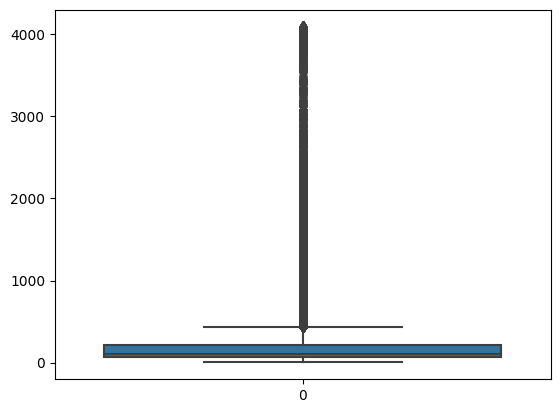

In [55]:
sns.boxplot(df['caracteres'])

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='caracteres', ylabel='Count'>

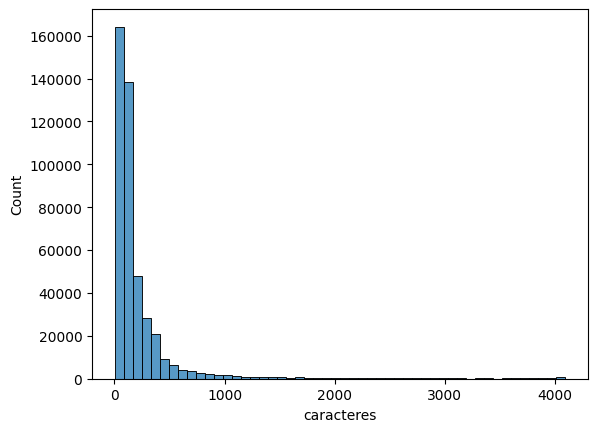

In [56]:
sns.histplot(df['caracteres'], bins=50, kde=False)


## Remoção de outliers

In [57]:
media = df['caracteres'].mean()
desvio = df['caracteres'].std()

limite_inferior = media - 3 * desvio
limite_superior = media + 3 * desvio


df_sem_outlier = df[(df['caracteres'] >= limite_inferior) & (df['caracteres'] <= limite_superior)]

df_sem_outlier.shape

(435054, 20)

<AxesSubplot: >

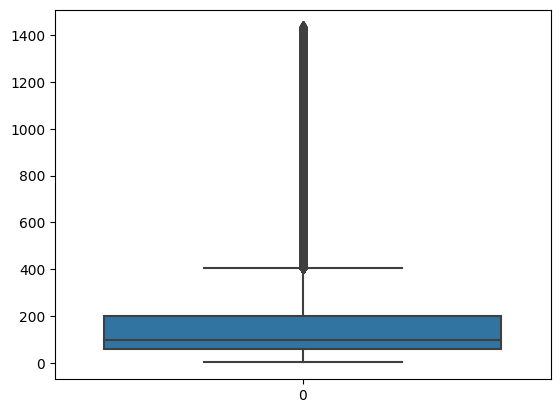

In [58]:
sns.boxplot(df_sem_outlier['caracteres'])

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='caracteres', ylabel='Count'>

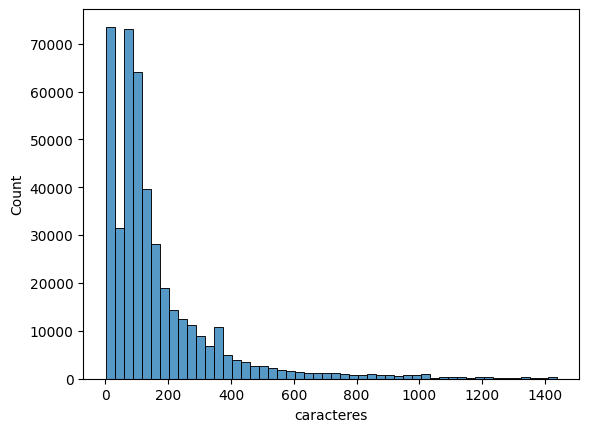

In [59]:
sns.histplot(df_sem_outlier['caracteres'], bins=50, kde=False)


In [60]:
df_sem_outlier['caracteres'].describe()


count    435054.000000
mean        167.813651
std         194.668772
min           1.000000
25%          60.000000
50%          99.000000
75%         198.000000
max        1437.000000
Name: caracteres, dtype: float64

In [61]:
df['words'] = df['text_content_anonymous'].str.split().str.len()
df[['text_content_anonymous', 'words']]

,text_content_anonymous,words
0,Então é Fato Renato o áudio que eu ouvi no wha...,20.0
1,"Saiu no YouTube do presidente a 8 horas atrás,...",23.0
2,"É isso, nossa parte já foi quase toda feita. N...",59.0
3,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,7.0
4,NaN,NaN
...,...,...
557581,"BNDES tem lucro de R$ 9,6 bilhões no terceiro ...",12.0
557582,https://youtu.be/8g1Vz9_0xVk,1.0
557583,"Empresários, demitam os petistas primeiro.\n\n...",6.0
557584,"Empresários, demitam os petistas primeiro.\n\n...",6.0


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='words', ylabel='Count'>

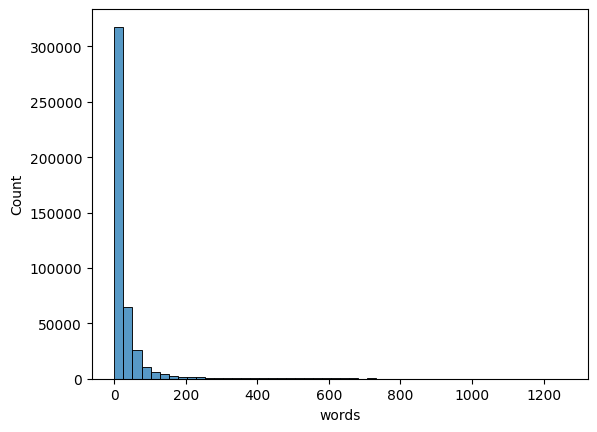

In [62]:
sns.histplot(df['words'], bins=50, kde=False)

In [63]:
df['words'].describe()

count    444201.000000
mean         32.474380
std          66.960835
min           1.000000
25%           6.000000
50%          15.000000
75%          30.000000
max        1261.000000
Name: words, dtype: float64

In [64]:
df['sharings'] = df['text_content_anonymous'].map(df['text_content_anonymous'].value_counts())


In [65]:
df['sharings']

0         1.0
1         1.0
2         1.0
3         1.0
4         NaN
         ... 
557581    2.0
557582    2.0
557583    4.0
557584    4.0
557585    4.0
Name: sharings, Length: 557586, dtype: float64

In [ ]:
df['sharings'].describe()

count    444201.000000
mean        708.840086
std        3378.882834
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max       17422.000000
Name: sharings, dtype: float64

In [72]:
df['viral'] = np.where(df['sharings'] >=5, 1, 0)
df['viral']

0         0
1         0
2         0
3         0
4         0
         ..
557581    0
557582    0
557583    0
557584    0
557585    0
Name: viral, Length: 557586, dtype: int32

In [73]:
df['viral'].value_counts()

viral
0    424968
1    132618
Name: count, dtype: int64

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='sharings', ylabel='Count'>

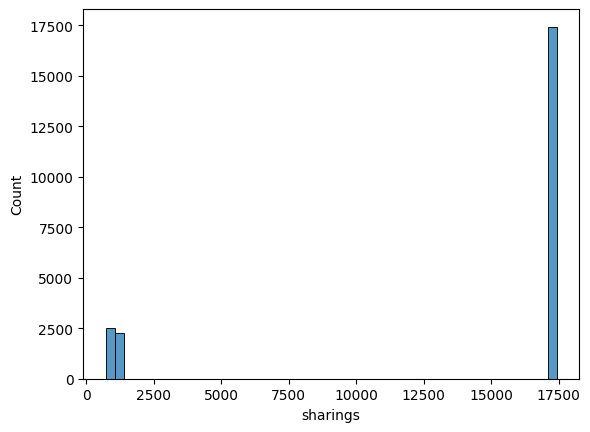

In [69]:
filtro_viral = df['viral'] == 1
df_so_viral = df[filtro_viral]
sns.histplot(df_so_viral['sharings'], bins=50, kde=False)

In [ ]:
df['sentiment'] = np.where(df['score_sentiment'] == 0, 'Neutro',
                           np.where(df['score_sentiment'] > 0.05, 'Positivo', 'Negativo'))


In [ ]:
df['sentiment'].value_counts()

sentiment
Negativo    244134
Neutro      179968
Positivo    133484
Name: count, dtype: int64

In [ ]:
df['trava_zap'].value_counts()

trava_zap
False    557570
True         16
Name: count, dtype: int64

In [ ]:
df_trava_zap_true = df[df['trava_zap'] == True]
df_trava_zap_true.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5,sentiment
21944,2022-10-07 07:46:52,NaN,c712c1b704c22bd0cef50bc06125cdbd,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-07 07:47:00.355052,0.0000,0.067344,53260,Texto,telegram,NaN,NaN,Neutro
89109,2022-10-16 00:45:02,8a30ac374bc4b5930eaf0667a178546a,e56ec342fc599ebb4ed89655eb6f03aa,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-16 00:45:04.064662,0.0000,0.056698,521324,Texto,telegram,NaN,NaN,Neutro
294541,2022-10-04 14:22:47,39ee10516124280a22f1798f2a41f9a7,959f13e0079883060632c74ffc81c547,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-04 14:22:48.808572,0.9734,0.010433,27241,Texto,telegram,NaN,NaN,Positivo
324567,2022-10-25 14:55:55,e003fbb6ffedb1838e42360d41cab314,5b10d7739171149be6d9961e3350c071,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-25 14:56:11.604972,0.9460,0.403945,1182938,Texto,telegram,NaN,NaN,Positivo
389164,2022-10-30 20:19:52,NaN,c8f2de56550ed0bf85249608b7ead93d,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-30 20:19:54.183578,0.0000,NaN,28330,Texto,telegram,NaN,NaN,Neutro


In [ ]:
df['text_content_anonymous']

0         Então é Fato Renato o áudio que eu ouvi no wha...
1         Saiu no YouTube do presidente a 8 horas atrás,...
2         É isso, nossa parte já foi quase toda feita. N...
3                  GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA
4                                                       NaN
                                ...                        
557581    BNDES tem lucro de R$ 9,6 bilhões no terceiro ...
557582                         https://youtu.be/8g1Vz9_0xVk
557583    Empresários, demitam os petistas primeiro.\n\n...
557584    Empresários, demitam os petistas primeiro.\n\n...
557585    Empresários, demitam os petistas primeiro.\n\n...
Name: text_content_anonymous, Length: 557586, dtype: object

In [ ]:
df_trava_zap = df.copy()

In [ ]:
import re

df_trava_zap['text_content_anonymous'] = df_trava_zap['text_content_anonymous'].astype("string")
df_trava_zap['caracteres_especial_count'] = df_trava_zap['text_content_anonymous'].apply(
    lambda x: len(re.findall(r'[^A-Za-z0-9]', str(x))) if pd.notnull(x) else 0
)


In [ ]:
df_trava_zap[['text_content_anonymous', 'caracteres_especial_count']]

,text_content_anonymous,caracteres_especial_count
0,Então é Fato Renato o áudio que eu ouvi no wha...,24
1,"Saiu no YouTube do presidente a 8 horas atrás,...",29
2,"É isso, nossa parte já foi quase toda feita. N...",77
3,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,8
4,<NA>,0
...,...,...
557581,"BNDES tem lucro de R$ 9,6 bilhões no terceiro ...",32
557582,https://youtu.be/8g1Vz9_0xVk,6
557583,"Empresários, demitam os petistas primeiro. ht...",14
557584,"Empresários, demitam os petistas primeiro. ht...",14


<AxesSubplot: >

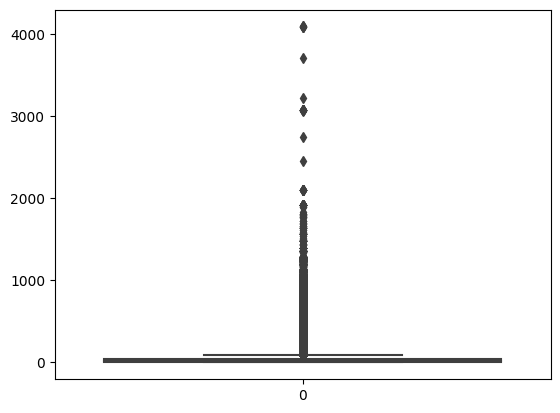

In [ ]:
sns.boxplot(df_trava_zap['caracteres_especial_count'])

In [ ]:
df_trava_zap['caracteres_especial_count'].describe()

count    557586.000000
mean         42.428605
std         101.838961
min           0.000000
25%           5.000000
50%          17.000000
75%          38.000000
max        4092.000000
Name: caracteres_especial_count, dtype: float64

In [ ]:
df_ordenado = df_trava_zap.sort_values(by='caracteres_especial_count', ascending=False)
df_ordenado

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5,sentiment,caracteres_especial_count
399869,2022-11-01 06:39:29,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:40:27.724734,0.0,NaN,328974,Texto,telegram,NaN,NaN,Neutro,4092
399859,2022-11-01 06:39:24,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:39:46.326797,0.0,NaN,328957,Texto,telegram,NaN,NaN,Neutro,4092
399870,2022-11-01 06:39:29,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:40:27.823781,0.0,NaN,328973,Texto,telegram,NaN,NaN,Neutro,4091
399858,2022-11-01 06:39:24,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:39:46.244728,0.0,NaN,328956,Texto,telegram,NaN,NaN,Neutro,4091
399860,2022-11-01 06:39:24,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *...,...,2022-11-01 06:39:46.419768,0.0,NaN,328958,Texto,telegram,NaN,NaN,Neutro,4085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126708,2022-10-17 17:36:20,NaN,9c2feb6ffd68ffe90b9dd60a8e4e4cba,0b3c401b00cf696ac0b2c482261b3c2e.jpg,image/jpg,NaN,True,False,False,<NA>,...,2022-10-17 17:36:21.600388,NaN,NaN,5966,Imagem,telegram,NaN,0b3c401b00cf696ac0b2c482261b3c2e,Negativo,0
381339,2022-10-31 13:13:03,NaN,857cd5311da1bdc15eb9e6918a47c6c6,f97dc502d2c21790e54d7990eafca89a.jpg,image/jpg,NaN,True,False,False,<NA>,...,2022-10-31 13:13:21.785435,NaN,NaN,981623,Imagem,telegram,NaN,f97dc502d2c21790e54d7990eafca89a,Negativo,0
286935,2022-10-03 19:34:17,NaN,ed3a8a78a8ecceab27b0a5be875a8c1b,7f8b5f52f09821f26355b331c15fc82a.jpg,image/jpg,NaN,True,False,False,<NA>,...,2022-10-03 19:34:18.266913,NaN,NaN,838,Imagem,telegram,NaN,7f8b5f52f09821f26355b331c15fc82a,Negativo,0
286937,2022-10-03 19:34:34,d36c39da7c9705400e5056e033363b65,86bd52718a6a22ac8fea566dc38d2026,9a2252e588e6e25cd99ed10836477e8d.jpg,image/jpg,NaN,True,False,False,<NA>,...,2022-10-03 19:34:35.6388,NaN,NaN,3892,Imagem,telegram,NaN,9a2252e588e6e25cd99ed10836477e8d,Negativo,0


In [ ]:
df_ordenado['caracteres_especial_count'].value_counts()

caracteres_especial_count
0       113900
17       35175
5        33788
6        13723
16       10994
         ...  
1139         1
1140         1
1150         1
1152         1
1206         1
Name: count, Length: 1201, dtype: int64

In [ ]:
num_caracteres_elevado = df_ordenado['caracteres_especial_count'] >= 1900
df_caracteres_elevado = df_ordenado[num_caracteres_elevado]
df_caracteres_elevado.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5,sentiment,caracteres_especial_count
399869,2022-11-01 06:39:29,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:40:27.724734,0.0,NaN,328974,Texto,telegram,NaN,NaN,Neutro,4092
399859,2022-11-01 06:39:24,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:39:46.326797,0.0,NaN,328957,Texto,telegram,NaN,NaN,Neutro,4092
399870,2022-11-01 06:39:29,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:40:27.823781,0.0,NaN,328973,Texto,telegram,NaN,NaN,Neutro,4091
399858,2022-11-01 06:39:24,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *๕...,...,2022-11-01 06:39:46.244728,0.0,NaN,328956,Texto,telegram,NaN,NaN,Neutro,4091
399860,2022-11-01 06:39:24,NaN,d9c080b9db8cd9d0e88e870ce782c01a,NaN,NaN,NaN,False,False,False,*๘๘๘๘๘๘๘๘* *๕๕๕๕๕๕๕๕* *๘๘๘๘๘๘๘๘* *๘๘๘๘๘๘๘๘* *...,...,2022-11-01 06:39:46.419768,0.0,NaN,328958,Texto,telegram,NaN,NaN,Neutro,4085


In [ ]:
df_caracteres_elevado.shape

(55, 21)

In [ ]:
# eliminando trava_zap

df['text_content_anonymous'] = df['text_content_anonymous'].astype("string")
df['caracteres_especial_count'] = df['text_content_anonymous'].apply(
    lambda x: len(re.findall(r'[^A-Za-z0-9]', str(x))) if pd.notnull(x) else 0
)

num_caracteres_elevado = df['caracteres_especial_count'] >= 1900
df_final = df[~num_caracteres_elevado]
df_final.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5,sentiment,caracteres_especial_count
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN,Neutro,24
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",...,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN,Positivo,29
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN,Negativo,77
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,Neutro,8
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,<NA>,...,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,Negativo,0


In [ ]:
df_final.shape

(557531, 21)